In [40]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [41]:
X, y = make_classification(n_samples=1500, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [42]:
X[:, 0] = np.random.choice([0, 1], 1500)
X[:, 1] = np.random.choice([0, 1], 1500)
X[:, 2] = np.random.randint(20, 66, 1500)
X[:, 3] = np.random.choice([1, 2, 3], 1500)
X[:, 4] = np.random.randint(0, 5, 1500)

In [43]:
df = pd.DataFrame(X, columns=['genero', 'casado', 'edad', 'clasificacion', 'hijos'])
df['cliente'] = y

In [44]:
df

,genero,casado,edad,clasificacion,hijos,cliente
0,1.0,0.0,60.0,2.0,3.0,0
1,0.0,1.0,56.0,3.0,2.0,0
2,1.0,0.0,24.0,3.0,0.0,1
3,1.0,0.0,64.0,3.0,3.0,0
4,1.0,1.0,59.0,1.0,2.0,1
...,...,...,...,...,...,...
1495,1.0,1.0,36.0,3.0,4.0,0
1496,1.0,1.0,65.0,3.0,1.0,1
1497,0.0,0.0,35.0,3.0,1.0,1
1498,1.0,0.0,39.0,1.0,1.0,1


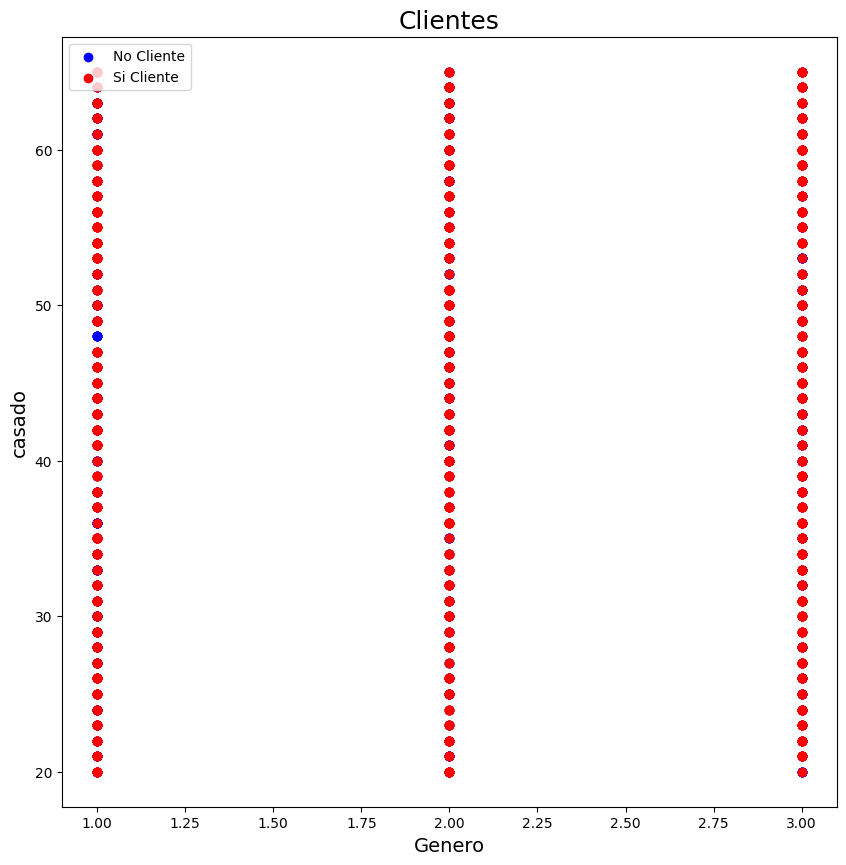

In [45]:

fig = plt.figure(figsize=(10, 10))

plt.scatter(df["clasificacion"][df["cliente"] == 0],
            df["edad"][df["cliente"] == 0], c="b", label="No Cliente")

plt.scatter(df["clasificacion"][df["cliente"] == 1],
            df["edad"][df["cliente"] == 1], c="r", label="Si Cliente")

plt.title("Clientes", fontsize=18)
plt.xlabel("Genero", fontsize=14)
plt.ylabel("casado", fontsize=14)
plt.legend()
plt.show()

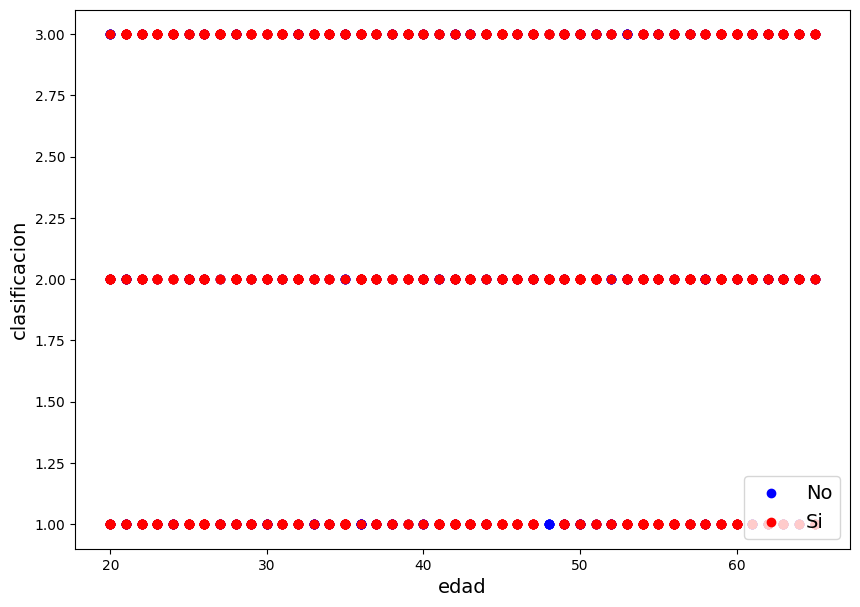

In [46]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

plt.scatter(df["edad"][df["cliente"] == 0],
            df["clasificacion"][df["cliente"] == 0], c="b", label="No")

plt.scatter(df["edad"][df["cliente"] == 1],
            df["clasificacion"][df["cliente"] == 1], c="r", label="Si")

plt.xlabel("edad", fontsize=14)
plt.ylabel("clasificacion", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

## Division del conjunto de datos

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("cliente", axis=1), df["cliente"], test_size=0.1)

In [48]:
# Transformamos las caracteríticas de entrada a un valor binario
X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])

X_train_bin

,genero,casado,edad,clasificacion,hijos
1133,1,1,0,0,0
1192,0,0,0,0,1
1268,0,1,1,1,0
1006,1,0,0,1,0
238,1,1,1,1,1
...,...,...,...,...,...
996,1,0,1,0,0
1298,1,1,1,1,1
1243,0,0,1,0,1
254,1,0,0,1,1


## Entrenamiento del algoritmo

In [49]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(n_jobs=-1, random_state=40)

In [50]:
clf.coef_.shape

(1, 5)

In [51]:
clf.coef_ # weights

array([[-117.,   42.,   22.,   75.,  -68.]])

In [52]:
clf.intercept_ # valor del bias

array([64.])

## Prediccion con el conjunto de pruebas

In [53]:
y_pred = clf.predict(X_test)

In [54]:
len(y_pred)

150

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="micro")

np.float64(0.4533333333333333)